# **Titanic Survival Prediction**

**Author:** Kasim Morsel  
**Objective:** Predict Titanic passenger survival using machine learning, following these steps:  
1. Exploratory Data Analysis (EDA)  
2. Feature Engineering  
3. Model Comparison & Evaluation  

**Tools:** Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn

---

## **1. Import Libraries**
- Core Python data analysis libraries (`pandas`, `numpy`)
- Visualization libraries (`matplotlib`, `seaborn`)
- Scikit-learn modules for preprocessing, model selection, and evaluation


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')


## **2. Load Data**
We load the training and test datasets into Pandas DataFrames:
- **`train.csv`**: Contains passenger information and survival outcome.
- **`test.csv`**: Contains passenger information without survival outcome (used for predictions).

We preview the first few rows to understand the structure and column names.


In [2]:
# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **3. Basic Dataset Information**
Here, we check:
- Dataset shape (rows × columns)
- Column names, data types, and non-null counts
- Missing values in each column
- Distribution of the target variable (`Survived`)

This step gives us an overview of the data and highlights any missing information that needs to be handled.


In [4]:
# Shape of datasets
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Info on columns & data types
train_df.info()

# Missing values (sorted highest → lowest)
train_df.isna().sum().sort_values(ascending=False)

# Target variable distribution
train_df['Survived'].value_counts(normalize=True)


Train shape: (891, 12)
Test shape: (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

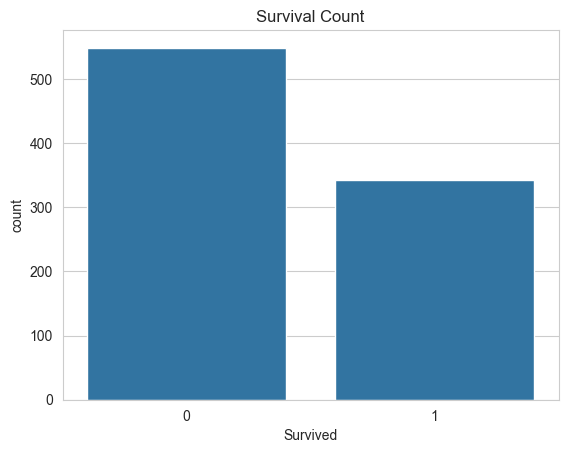

In [5]:
# Survival count
sns.countplot(data=train_df, x='Survived')
plt.title("Survival Count")
plt.show()

## 5. Survival by Passenger Class
Clear socio-economic effect: 1st class had higher survival; 3rd class lowest.


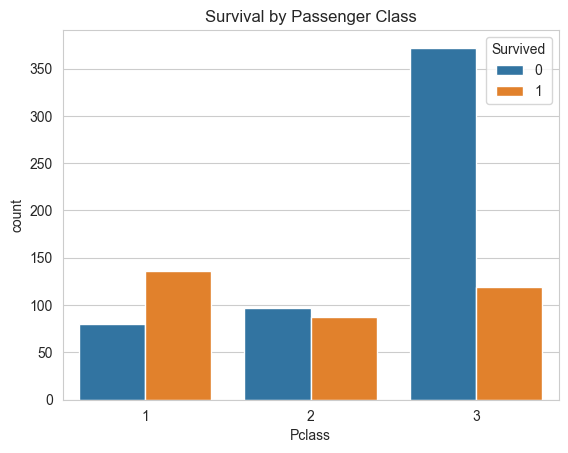

In [6]:
# Passenger class vs survival
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

## 6. Survival by Sex
Females survived at much higher rates (“women and children first”).


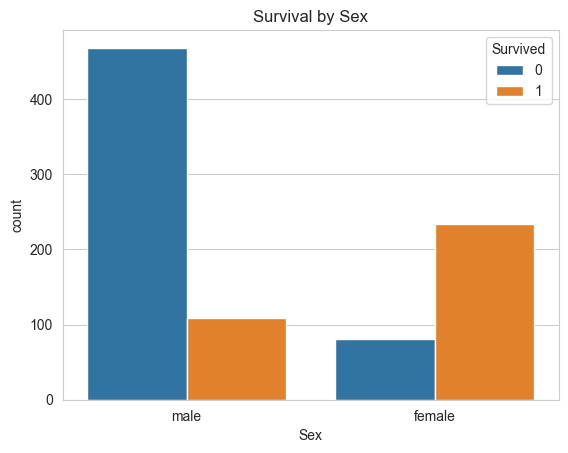

In [7]:
# Sex vs survival
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title("Survival by Sex")
plt.show()

## 7. Age Distribution by Survival
Survivors skew slightly younger; young children have better chances.


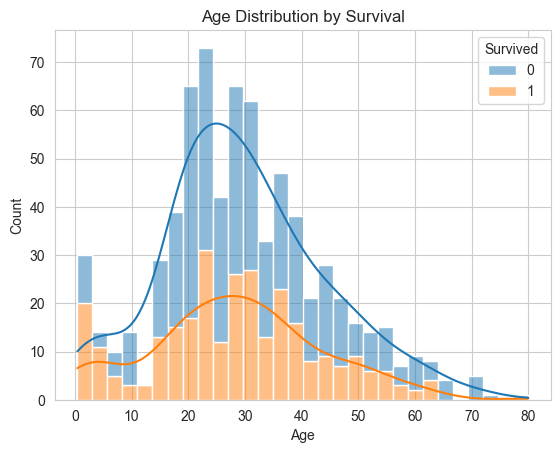

In [8]:
# Age distribution
sns.histplot(data=train_df, x='Age', bins=30, kde=True, hue='Survived', multiple='stack')
plt.title("Age Distribution by Survival")
plt.show()

## 8. Fare vs Survival
Higher fares (often higher class) align with higher survival; many low-fare passengers did not survive.


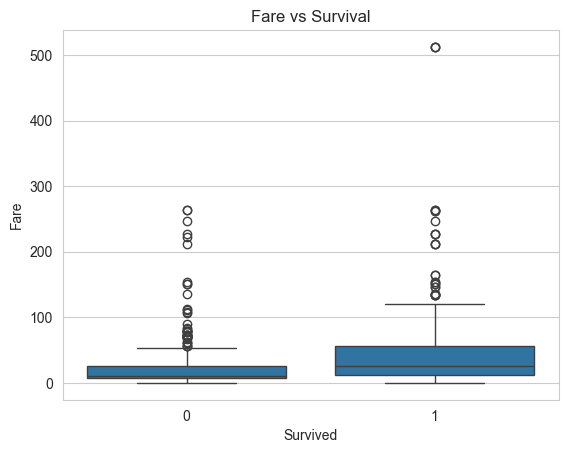

In [10]:
# Fare distribution by survival
sns.boxplot(data=train_df, x='Survived', y='Fare')
plt.title("Fare vs Survival")
plt.show()

## 9. Embarkation Port vs Survival
Weaker on its own; may interact with `Pclass`/`Fare`.


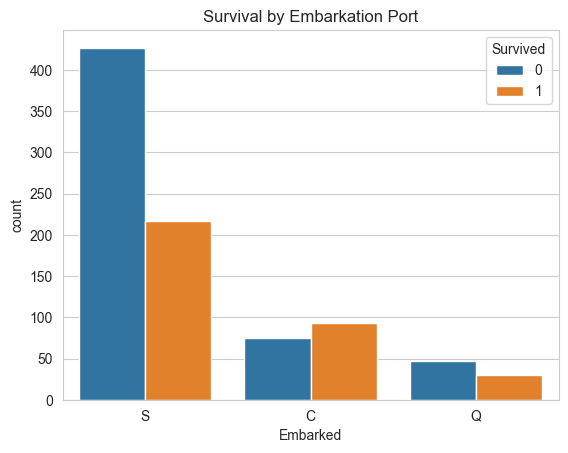

In [11]:
# Embarked port vs survival
sns.countplot(data=train_df, x='Embarked', hue='Survived')
plt.title("Survival by Embarkation Port")
plt.show()

## 10. Correlation Heatmap (Numeric Only)
Confirms `Pclass` (−), `Fare` (+) relate to survival; `Age` weak. `SibSp` and `Parch` correlate → combine into `FamilySize`.


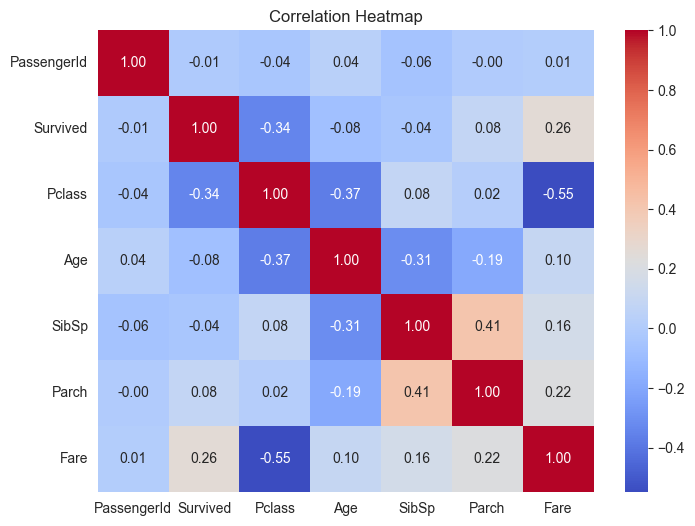

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Key EDA Insights:
- Women and children had higher survival rates.
- Higher passenger class strongly correlated with survival.
- Fare had a positive correlation with survival, although with many outliers.
